<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Matteo Fiore 
<b> Student 2:</b> Hanna Johansson
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 

To generate your final report, use print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by April 7th 2017. 

# Introduction


In this session, your will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyper parameters. You will use the MNIST dataset which was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get restults. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command : 
from filename import *

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays.

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots
 








# Section 1 :  My First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the above Neural network with two inputs $X=(x1,x2)$, one hidden layers and a single output unit $(y)$.
The initial weights are set to random values. Neurons 6 and 7 represent the bias. Bias values are equal to 1.  
Training sample, X = (0.8, 0.2), whose class label is Y=0.4.

Assume that the neurons have a Sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$ and the learning rate $\mu$=1


<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.

#Your answer goes here :

$w_{1,3}= 0.2959  $ 

$w_{1,4}= -0.4972$

$w_{2,3}= 0.7990 $

$w_{2,4}= 0.2007 $

$w_{6,3}= 0.1948 $

$w_{6,4}= -0.3965 $

$w_{3,5}= -0.5746 $

$w_{4,5}= 0.4126 $

$w_{7,5}= 0.5394 $




<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py </a> file) and reinitialise weights. 
Then you will to complete the Feed Forward and the Back-propagation functions. 

<b>Question 1.2.1</b>: Define the neural network corresponding to the one in part 1

In [1]:
from NeuralNetwork import *
#create the network
my_first_net = NeuralNetwork(2,2,1)

In [2]:
#Data preparation 
X=[0.8,0.2] #inputs
Y=[0.4]
data=[]
data.append(X)
data.append(Y)

#initialize weights
wi=np.array([[0.3,-0.5],[0.8,0.2],[0.2,-0.4]])
wo=np.array([[-0.6],[0.4],[0.5]])
my_first_net.weights_initialisation(wi,wo)
print(my_first_net.W_input_to_hidden)
print(my_first_net.W_hidden_to_output)


[[ 0.3 -0.5]
 [ 0.8  0.2]
 [ 0.2 -0.4]]
[[-0.6]
 [ 0.4]
 [ 0.5]]


<b>Question 1.2.2</b>: Implement the Feed Forward function (feedForward(X) in the NeuralNetwork.py file)



In [3]:
def feedForward(self, inputs, t_func=sigmoid):
    # Compute input activations
    self.a_input = np.array(np.append(inputs,[1]))

    #Compute  hidden activations=
    self.a_hidden = np.append(self.a_input.dot(self.W_input_to_hidden),[1])

    # Compute output activations
    self.a_out = t_func(self.a_hidden).dot(self.W_hidden_to_output)
    return t_func(self.a_out)

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
        We added <i>t_func</i> so later on we will be able to arbitrary change the transfer function.
</div>

Check your network outputs the expected value (the one you computed in question 1.1)

In [4]:
#test my  Feed Forward function 
Output_activation=my_first_net.feedForward(X)
# print("output activation =%.3f" %(Output_activation))
print(Output_activation)


[ 0.526374]


<b>Question 1.2.3</b>: Implement the Back-propagation Algorithm (backPropagate(Y) in the NeuralNetwork.py file)  


Check the gradient values and weight updates are correct (similar to the ones you computed in question 1.1)

In [6]:
def backPropagate(self, targets):

    # calculate error terms for output
    u_E_out = (sigmoid(self.a_out)-targets)*(dsigmoid(self.a_out))
    w_E_out = sigmoid(self.a_hidden).reshape(len(sigmoid(self.a_hidden)),1).dot(u_E_out.reshape(len(u_E_out),1))
    # calculate error terms for hidden
    u_E_hidden = u_E_out.sum()*self.W_input_to_hidden.dot(dsigmoid(self.a_hidden[:-1]))
    w_E_hidden = u_E_hidden*self.a_input
    # update output weights
    self.W_hidden_to_output = self.W_hidden_to_output - self.learning_rate*w_E_out
    # update input weights
    self.W_input_to_hidden = self.W_input_to_hidden - self.learning_rate*w_E_hidden[:-1]

    # calculate error
    return np.square(sigmoid(self.a_out)-targets).sum()

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>



<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
    <i>**u_E_out**</i>  is a vector of size equal to the number of neurons in the output layer<br>
    <i>**w_E_out**</i>  is a matrix: each row correspond to a neuron in the hidden layer and the columns correspond to the neurons of the output layer
    <br> &emsp; Dimensions: (size_hidden,1)\*(1,size_out) --> (size_hidden,size_out) <br>
    <i>**u_E_hidden**</i> is a vector of size equal to the number of neurons in the hidden layer without considering the hidden layer <br>
    <i>**w_E_hidden**</i> is a matrix: each row correspond to an input and the columns correspond to the neurons in the hidden layer
    <br> &emsp; Dimensions: (size_input,1)\*(1,size_hidden)\*constant --> (size_input,size_hidden) <br>

</div>

In [5]:
#test my  Back-propagation function
my_first_net.backPropagate(Y)
#Print weights after backpropagation
print 'wi_new=', my_first_net.W_input_to_hidden
print 'wo_new=', my_first_net.W_hidden_to_output


wi_new= [[ 0.30034598 -0.50021889]
 [ 0.8000865   0.19994528]
 [ 0.20043248 -0.40027361]]
wo_new= [[-0.60203418]
 [ 0.39899609]
 [ 0.49769676]]


Your Feed Forward and Back-Propagation implementations are working, Great!! Let's tackle a real world problem.

In [6]:
for i in range(20000):
    my_first_net.feedForward(X)
    my_first_net.backPropagate(Y)
print(my_first_net.feedForward(X))

[ 0.4]


<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
       We can see how feedforward and backpropagation allow us to reach the expected value of 0.4
    
</div>

# Section 2 : The MNIST Challenge! 

<b>Data Preparation</b>

The MNIST dataset consists of handwritten digit images it contains 60,000 examples for the training set and 10,000 examples for testing. In this Lab Session, the official training set of 60,000 is divided into an actual training set of 50,000 examples, 10,000 validation examples and 10,000 examples for test. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. The images are stored in byte form you will use the NumPy python library to read the data files into NumPy arrays that we will use to train the ANN.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the the load_data() function.


In [2]:
from utils import *
training_data, validation_data, test_data=load_data()

Loading MNIST data .....
Done.


<b>MNIST Dataset Digits Visualisation</b>

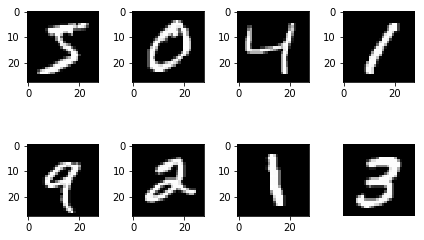

In [3]:
ROW = 2
COLUMN = 4
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = training_data[i][0].reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()



<b>Part 1</b>: Creating the Neural Networks

The input layer of the neural network contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. The second layer of the network is a hidden layer, we set the neuron number in the hidden layer to 30. The output layer contains 10 neurons. 

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class

In [7]:
#create the network
from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784,30,10)

<b>Question 2.1.2</b>: Add the information about the performance of the neural network on the test set at each epoch

In [7]:
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)

Test_Accuracy  8.47


<b>Question 2.1.3</b>: Train the Neural Network and comment your findings

Iteration:  1/50[==============] -Error: 0.3331826711  -Training_Accuracy:  87.97  -time: 16.58 
Iteration:  2/50[==============] -Error: 0.1810773941  -Training_Accuracy:  90.42  -time: 33.16 
Iteration:  3/50[==============] -Error: 0.1502820708  -Training_Accuracy:  91.77  -time: 49.83 
Iteration:  4/50[==============] -Error: 0.1337730771  -Training_Accuracy:  92.57  -time: 69.04 
Iteration:  5/50[==============] -Error: 0.1229617805  -Training_Accuracy:  93.22  -time: 90.32 
Iteration:  6/50[==============] -Error: 0.1142891850  -Training_Accuracy:  93.55  -time: 110.28 
Iteration:  7/50[==============] -Error: 0.1080214496  -Training_Accuracy:  94.02  -time: 130.28 
Iteration:  8/50[==============] -Error: 0.1027998137  -Training_Accuracy:  94.16  -time: 150.53 
Iteration:  9/50[==============] -Error: 0.0978471624  -Training_Accuracy:  94.53  -time: 170.81 
Iteration: 10/50[==============] -Error: 0.0938685651  -Training_Accuracy:  94.80  -time: 190.97 
Iteration: 11/50[========

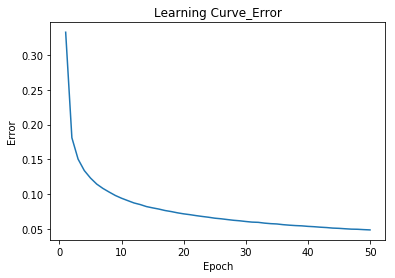

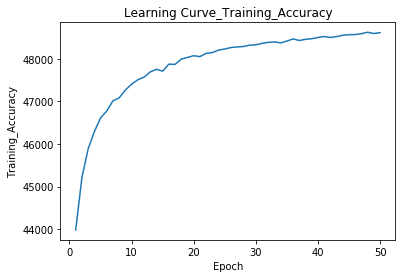

In [8]:
#train your network 
my_mnist_net.train(training_data,validation_data)
my_mnist_net.save('mod_H30_O10_It50_LR01_FuncSigm.model')


<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
 We can divide the error curve in two parts:

        <ul>
        <li> the first part consists of the first 8 iterations, where the error decreases a lot
        <li> the second part consists of the remaining iterations 
        </ul>       
        
        In the first part the error decreases significantly, from 0.33 to 0.10 (reduction of 0.23).
        <br>
        
        In the second part (the following 42 iteration) the network reduces the error by 0.05 only. This means that every 8 iterations the error changes by 0,0095. 
        <br><br>
        Comparing the two parts we can conclude that after a while it becomes impractical to continue to train the network, expecially if time costraints are present. That is because there is a drop by 96% in how fast the error is decreasing from the first to the second part.
        <br><br>
        Focusing on the accuracy, we can notice a similar trend. In this case the accuracy is increasing slower in the second part than in the first part.        

</div>

<b>Question 2.1.4</b>: Guess digit, Implement and test a python function that predict the class of a digit (the folder images_test contains some examples of images of digits)


Output trained network: 3
Output not trained network: 5


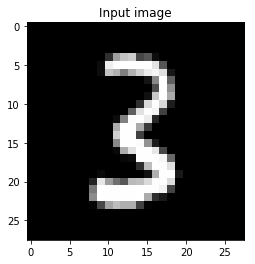

In [9]:
#Your implementation goes here
def predict_digit(d_net,img):
    return np.argmax(d_net.feedForward(img))

not_trained_mnist_net = NeuralNetwork(784,30,10)

data = test_data[0][0]
print 'Output trained network:',predict_digit(my_mnist_net,data)
print 'Output not trained network:',predict_digit(not_trained_mnist_net,data)
img = data.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title('Input image')
plt.show()

<b>Part 2</b>: Change the neural network structure and parameters to optimize performance

<b> Question 2.2.1</b>: Change the learning rate (0.001, 0.1, 1.0 , 10). Train the new neural nets with the original specifications (Part 2.1), for 50 iterations. 
Plot test accuracy vs iteration for each learning rate on the same graph. Report the maximum
test accuracy achieved for each learning rate. Which one achieves the maximum test accuracy?

Iteration:  1/50[==============] -Error: 0.9694670932  -Training_Accuracy:  33.90  -time: 18.65 
Iteration:  2/50[==============] -Error: 0.7920663348  -Training_Accuracy:  44.46  -time: 37.31 
Iteration:  3/50[==============] -Error: 0.7348235187  -Training_Accuracy:  52.06  -time: 56.12 
Iteration:  4/50[==============] -Error: 0.6860320914  -Training_Accuracy:  56.66  -time: 73.97 
Iteration:  5/50[==============] -Error: 0.6443567124  -Training_Accuracy:  60.51  -time: 90.54 
Iteration:  6/50[==============] -Error: 0.6086715677  -Training_Accuracy:  63.38  -time: 109.46 
Iteration:  7/50[==============] -Error: 0.5781134659  -Training_Accuracy:  65.75  -time: 128.23 
Iteration:  8/50[==============] -Error: 0.5518427983  -Training_Accuracy:  67.52  -time: 148.50 
Iteration:  9/50[==============] -Error: 0.5290862429  -Training_Accuracy:  69.12  -time: 166.65 
Iteration: 10/50[==============] -Error: 0.5091857249  -Training_Accuracy:  70.32  -time: 184.80 
Iteration: 11/50[========

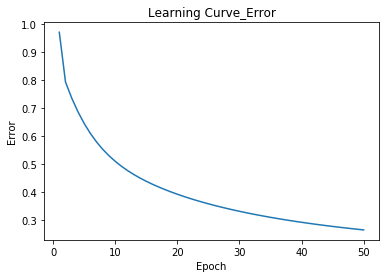

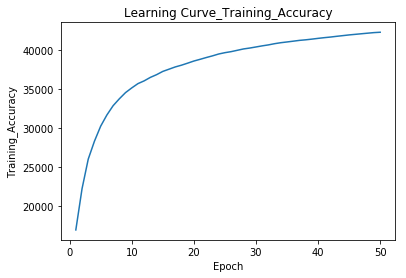

In [14]:
#Your implementation with a learning rate of 0.001 goes here 
my_mnist_net = NeuralNetwork(784,30,10,learning_rate=0.001)
my_mnist_net.train(training_data,validation_data)

Iteration:  1/50[==============] -Error: 0.3257660080  -Training_Accuracy:  87.44  -time: 18.00 
Iteration:  2/50[==============] -Error: 0.1848988193  -Training_Accuracy:  90.37  -time: 35.99 
Iteration:  3/50[==============] -Error: 0.1526750245  -Training_Accuracy:  91.69  -time: 54.54 
Iteration:  4/50[==============] -Error: 0.1350114238  -Training_Accuracy:  92.43  -time: 72.38 
Iteration:  5/50[==============] -Error: 0.1238588158  -Training_Accuracy:  93.04  -time: 90.53 
Iteration:  6/50[==============] -Error: 0.1152704922  -Training_Accuracy:  93.52  -time: 108.45 
Iteration:  7/50[==============] -Error: 0.1086190371  -Training_Accuracy:  93.83  -time: 125.93 
Iteration:  8/50[==============] -Error: 0.1034462565  -Training_Accuracy:  94.16  -time: 143.74 
Iteration:  9/50[==============] -Error: 0.0987765643  -Training_Accuracy:  94.41  -time: 161.91 
Iteration: 10/50[==============] -Error: 0.0951015759  -Training_Accuracy:  94.71  -time: 179.60 
Iteration: 11/50[========

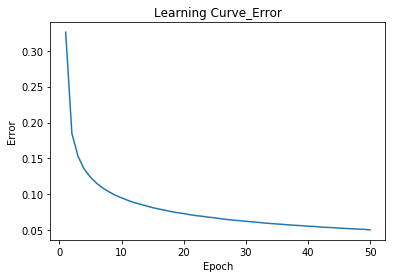

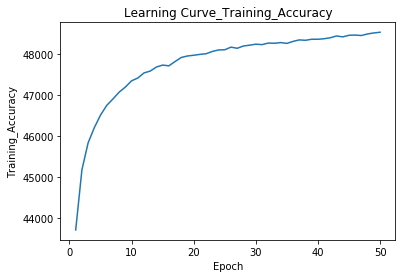

In [15]:
#Your implementation with a learning rate of 0.1 goes here 
my_mnist_net = NeuralNetwork(784,30,10,learning_rate=0.1)
my_mnist_net.train(training_data,validation_data)

Iteration:  1/50[==============] -Error: 0.2177924186  -Training_Accuracy:  91.28  -time: 17.96 
Iteration:  2/50[==============] -Error: 0.1393926816  -Training_Accuracy:  92.63  -time: 35.97 
Iteration:  3/50[==============] -Error: 0.1261120371  -Training_Accuracy:  93.45  -time: 53.84 
Iteration:  4/50[==============] -Error: 0.1163714186  -Training_Accuracy:  93.59  -time: 72.04 
Iteration:  5/50[==============] -Error: 0.1100805428  -Training_Accuracy:  94.30  -time: 89.85 
Iteration:  6/50[==============] -Error: 0.1046088603  -Training_Accuracy:  94.34  -time: 108.13 
Iteration:  7/50[==============] -Error: 0.1039807566  -Training_Accuracy:  93.86  -time: 125.70 
Iteration:  8/50[==============] -Error: 0.0983801359  -Training_Accuracy:  94.95  -time: 143.66 
Iteration:  9/50[==============] -Error: 0.0968722066  -Training_Accuracy:  93.68  -time: 161.15 
Iteration: 10/50[==============] -Error: 0.0950446354  -Training_Accuracy:  95.00  -time: 179.84 
Iteration: 11/50[========

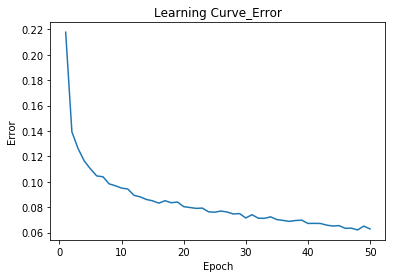

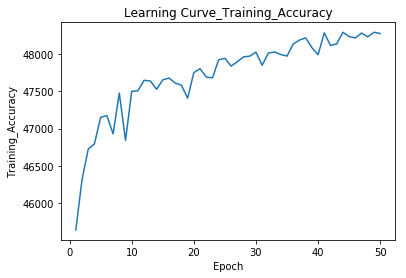

In [16]:
#Your implementation with a learning rate of 1.0 goes here 
my_mnist_net = NeuralNetwork(784,30,10,learning_rate=1.0)
my_mnist_net.train(training_data,validation_data)

Iteration:  1/50[==============] -Error: 1.0006971043  -Training_Accuracy:  15.33  -time: 18.08 
Iteration:  2/50[==============] -Error: 1.2024232643  -Training_Accuracy:  15.06  -time: 36.00 


transfer_functions.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Iteration:  3/50[==============] -Error: 1.0030614660  -Training_Accuracy:  15.96  -time: 54.22 
Iteration:  4/50[==============] -Error: 1.0000155129  -Training_Accuracy:  18.38  -time: 72.10 
Iteration:  5/50[==============] -Error: 0.9982643982  -Training_Accuracy:  13.36  -time: 90.10 
Iteration:  6/50[==============] -Error: 0.9999998139  -Training_Accuracy:  12.92  -time: 108.07 
Iteration:  7/50[==============] -Error: 0.9999997887  -Training_Accuracy:  12.77  -time: 125.93 
Iteration:  8/50[==============] -Error: 0.9999997527  -Training_Accuracy:  12.68  -time: 143.62 
Iteration:  9/50[==============] -Error: 0.9999996960  -Training_Accuracy:  12.92  -time: 161.73 
Iteration: 10/50[==============] -Error: 0.9999995908  -Training_Accuracy:  13.60  -time: 179.71 
Iteration: 11/50[==============] -Error: 0.9999993066  -Training_Accuracy:  13.94  -time: 197.55 
Iteration: 12/50[==============] -Error: 1.0001209021  -Training_Accuracy:  10.38  -time: 215.58 
Iteration: 13/50[======

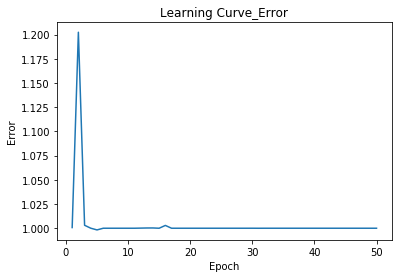

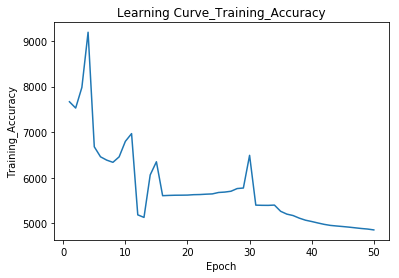

In [17]:
#Your implementation with a learning rate of 10 goes here 
my_mnist_net = NeuralNetwork(784,30,10,learning_rate=10.0)
my_mnist_net.train(training_data,validation_data)

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     

<h3>Learning Curve_Error</h3>
<br>
We can notice that the error is decreasing over time in all cases, but there are some differences in the final outcome.<br>
We are dividing the analysis in two parts: by higher and lower final error.
<br>
<h5>Learning Rate 0.1 and 1.0</h5>
With those learning rates we obtained the lowest error in the end of the simulation. There are some differences in the curve: if we consider the learning rate as a <i>momentum</i>, we can say that the higher the learning rate, the higher is the probability that exploring the solution space a non optimal one will be considered. That is the reason why in the graph with learning rate equal to 1.0 there are some points in which the error is increasing instead of smoothly decreasing.
<br>
<h5>Learning Rate 0.001 and 10.0</h5>
In the case of learning rate equal to 0.001, the curve is smooth and decreasing, but since the updates of the weigths are so small during the training, 50 iterations are not enough to reach the optimal solution. We can conclude that a very small learning rate is not optimal from the point of view of the time.<br><br>
In the case of learning rate equal to 10.0, we experienced an overflow. However, we can infer that it will be very difficult to reach the optimum since we are updating the weights with quite large steps. As we mentioned before this also means having a big momentum with the same consequences as in the previous case. 
<br>
<h3>Learning Curve_Training_Accuracy</h3>
<br>
The trend of the accuracy is consistent with the trend of the error, except for the last case (learning rate = 10.0). What we want to point out is that for the case where the learning rate is equal to 0.001 we did not have enough iterations to reach the optimum. It is also possible to see even clearer how the high momentum is affecting the choice of the weights and therefore the accuracy itself. The best case, as for the error, was the learning rate equal to 0.1.

</div>

 <b> Question 2.2.2 : </b> initialize all weights to 0.  Plot the training accuracy curve.
Comment your results
    
        

Iteration:  1/50[==============] -Error: 0.6774707754  -Training_Accuracy:  48.78  -time: 16.26 
Iteration:  2/50[==============] -Error: 0.6331522957  -Training_Accuracy:  47.89  -time: 32.35 
Iteration:  3/50[==============] -Error: 0.6305803038  -Training_Accuracy:  49.47  -time: 48.42 
Iteration:  4/50[==============] -Error: 0.6291168491  -Training_Accuracy:  49.15  -time: 64.52 
Iteration:  5/50[==============] -Error: 0.6282150073  -Training_Accuracy:  50.31  -time: 80.87 
Iteration:  6/50[==============] -Error: 0.6275318202  -Training_Accuracy:  49.74  -time: 96.95 
Iteration:  7/50[==============] -Error: 0.6244507466  -Training_Accuracy:  45.92  -time: 113.05 
Iteration:  8/50[==============] -Error: 0.6270379312  -Training_Accuracy:  53.59  -time: 130.20 
Iteration:  9/50[==============] -Error: 0.6238074479  -Training_Accuracy:  42.16  -time: 147.17 
Iteration: 10/50[==============] -Error: 0.6253989736  -Training_Accuracy:  49.89  -time: 164.71 
Iteration: 11/50[=========

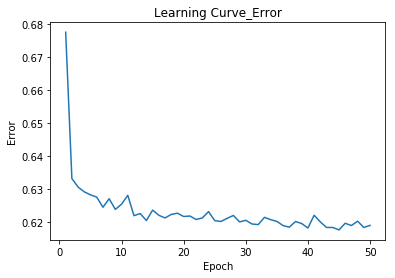

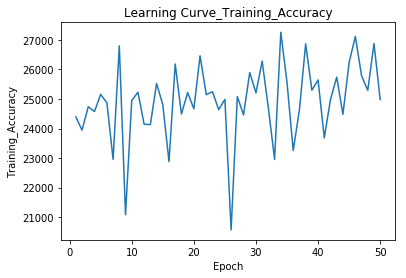

In [20]:
#Your implementation goes here
my_mnist_net = NeuralNetwork(784,30,10,learning_rate=1.0)
wi=np.zeros([785,30])
wo=np.zeros([31,10])
# wi=np.array([[0]*30]*785)
# wo=np.array([[0]*10]*30)
my_mnist_net.weights_initialisation(wi,wo)
my_mnist_net.train(training_data,validation_data)

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
Since everything is symmetric all neurons in each layer will have exactly the same activation. During the back propagation the neurons in each layer will also be updated by the same value. As a consequence it is difficult for the network to improve and reach a good result, which can be seen in the two graphs above.

</div>


<b> Question 2.2.3 : </b> Try with a different transfer function (such as tanh).
 File transfer_functions.py provides you the python implementation of the tanh function and its derivative

Iteration:  1/50[==============] -Error: 0.7220764403  -Training_Accuracy:  59.09  -time: 13.99 
Iteration:  2/50[==============] -Error: 0.6651901044  -Training_Accuracy:  61.97  -time: 27.91 
Iteration:  3/50[==============] -Error: 0.6497905341  -Training_Accuracy:  62.57  -time: 41.80 
Iteration:  4/50[==============] -Error: 0.6365049342  -Training_Accuracy:  63.35  -time: 55.61 
Iteration:  5/50[==============] -Error: 0.6248075009  -Training_Accuracy:  64.19  -time: 69.63 
Iteration:  6/50[==============] -Error: 0.6142730986  -Training_Accuracy:  65.62  -time: 84.30 
Iteration:  7/50[==============] -Error: 0.6040573452  -Training_Accuracy:  66.03  -time: 99.07 
Iteration:  8/50[==============] -Error: 0.5943062380  -Training_Accuracy:  67.26  -time: 115.64 
Iteration:  9/50[==============] -Error: 0.5850950093  -Training_Accuracy:  68.01  -time: 130.73 
Iteration: 10/50[==============] -Error: 0.5767337207  -Training_Accuracy:  69.22  -time: 146.25 
Iteration: 11/50[==========

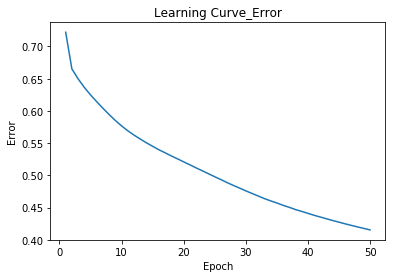

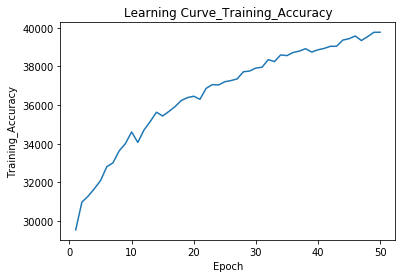

Iteration:  1/50[==============] -Error: 0.7006780817  -Training_Accuracy:  62.04  -time: 15.25 
Iteration:  2/50[==============] -Error: 0.6055350800  -Training_Accuracy:  71.12  -time: 30.07 
Iteration:  3/50[==============] -Error: 0.5563756023  -Training_Accuracy:  71.92  -time: 45.60 
Iteration:  4/50[==============] -Error: 0.5135582909  -Training_Accuracy:  74.66  -time: 62.95 
Iteration:  5/50[==============] -Error: 0.4798204987  -Training_Accuracy:  77.13  -time: 77.71 
Iteration:  6/50[==============] -Error: 0.4535258514  -Training_Accuracy:  78.33  -time: 93.54 
Iteration:  7/50[==============] -Error: 0.4328949235  -Training_Accuracy:  80.59  -time: 108.16 
Iteration:  8/50[==============] -Error: 0.4145689424  -Training_Accuracy:  81.09  -time: 123.62 
Iteration:  9/50[==============] -Error: 0.3993876352  -Training_Accuracy:  81.74  -time: 138.70 
Iteration: 10/50[==============] -Error: 0.3847398914  -Training_Accuracy:  81.72  -time: 153.47 
Iteration: 11/50[=========

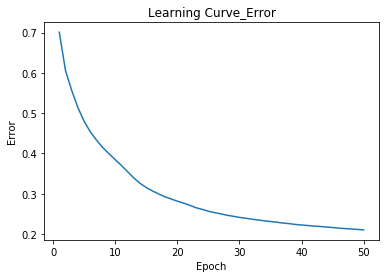

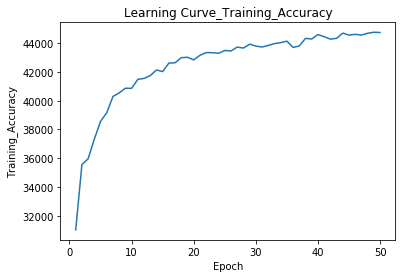

Iteration:  1/50[==============] -Error: 9.2740351508  -Training_Accuracy:  10.13  -time: 22.91 
Iteration:  2/50[==============] -Error: 9.3870353785  -Training_Accuracy:  9.87  -time: 43.11 
Iteration:  3/50[==============] -Error: 9.3873599750  -Training_Accuracy:  9.87  -time: 57.84 
Iteration:  4/50[==============] -Error: 9.3873599720  -Training_Accuracy:  9.87  -time: 73.01 
Iteration:  5/50[==============] -Error: 9.3873599681  -Training_Accuracy:  9.87  -time: 89.22 
Iteration:  6/50[==============] -Error: 9.3873599621  -Training_Accuracy:  9.87  -time: 106.12 
Iteration:  7/50[==============] -Error: 9.3873599529  -Training_Accuracy:  9.87  -time: 122.97 
Iteration:  8/50[==============] -Error: 9.3873599356  -Training_Accuracy:  9.87  -time: 139.10 
Iteration:  9/50[==============] -Error: 9.3873598970  -Training_Accuracy:  9.87  -time: 158.48 
Iteration: 10/50[==============] -Error: 9.3873597718  -Training_Accuracy:  9.87  -time: 181.36 
Iteration: 11/50[==============] -

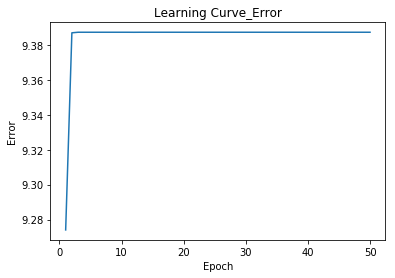

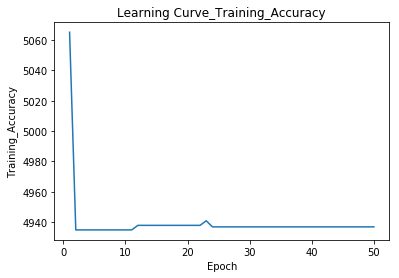

Iteration:  1/50[==============] -Error: 12.6154462642  -Training_Accuracy:  9.72  -time: 18.33 
Iteration:  2/50[==============] -Error: 12.6112799999  -Training_Accuracy:  9.72  -time: 36.71 
Iteration:  3/50[==============] -Error: 12.6112799999  -Training_Accuracy:  9.72  -time: 54.87 
Iteration:  4/50[==============] -Error: 12.6112799999  -Training_Accuracy:  9.72  -time: 73.69 
Iteration:  5/50[==============] -Error: 12.6112799999  -Training_Accuracy:  9.72  -time: 90.90 
Iteration:  6/50[==============] -Error: 12.6112799999  -Training_Accuracy:  9.72  -time: 106.91 
Iteration:  7/50[==============] -Error: 12.6112799999  -Training_Accuracy:  9.72  -time: 124.59 
Iteration:  8/50[==============] -Error: 12.6112799999  -Training_Accuracy:  9.72  -time: 140.63 
Iteration:  9/50[==============] -Error: 12.6112799999  -Training_Accuracy:  9.72  -time: 155.69 
Iteration: 10/50[==============] -Error: 12.6112799999  -Training_Accuracy:  9.72  -time: 170.38 
Iteration: 11/50[========

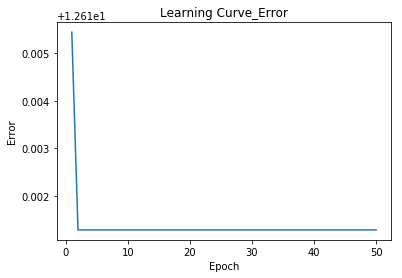

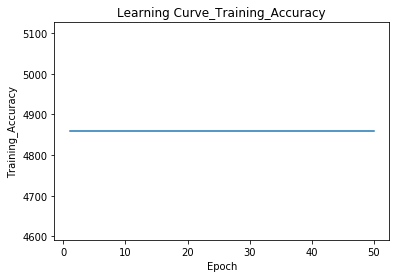

In [14]:
#Your implementation goes here
errors = {}
net_30_tanh = NeuralNetwork(784,30,10)
wi = net_30_tanh.W_input_to_hidden
wo = net_30_tanh.W_hidden_to_output
for i in [0.001,0.01,1.0,10.0]:
    net_30_tanh.weights_initialisation(wi=wi,wo=wo)
    net_30_tanh.learning_rate=i
    net_30_tanh.train(training_data,validation_data,t_fnc=tanh, d_fnc=dtanh)
    errors[i] = net_30_tanh.errors


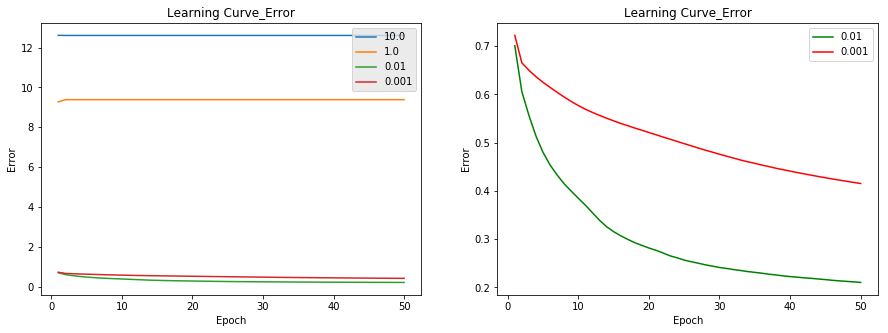

In [89]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(range(1,net_30_tanh.iterations+1),errors[10.0],label='10.0')
ax1.plot(range(1,net_30_tanh.iterations+1),errors[1.0],label='1.0')
ax1.plot(range(1,net_30_tanh.iterations+1),errors[0.01],label='0.01')
ax1.plot(range(1,net_30_tanh.iterations+1),errors[0.001],label='0.001')

legend = ax1.legend(loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('0.90')

ax2 = fig.add_subplot(122)
ax2.plot(range(1,net_30_tanh.iterations+1),errors[0.01],label='0.01',color='g')
ax2.plot(range(1,net_30_tanh.iterations+1),errors[0.001],label='0.001',color='r')

legend2 = ax2.legend(loc='upper right')
frame2 = legend.get_frame()
frame2.set_facecolor('0.90')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Error')
ax1.set_title('Learning Curve_Error')

plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Learning Curve_Error')
plt.show()

In [100]:
# np.save('wi',wi)
# np.save('wo',wo)
# np.save('errors223',errors)

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>



<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
We can notice how also with a different activation function the result have the similar trend as in the simulation before. The best learning rate is 0.01, that is the best compromise between fine esploration of the solutions in the neighborhood and rapidity of convergence.<br>
The use use tanh should avoid the problem of introducing bias for the layesr after the first hidden layer, since the output of the derivative is [-1,1], while the one of the derivative of the sigmoid is [0,1]. In addition, since the gradient of the tanh is greater than the one of the sigmoid, using the tanh for neural network with large connectivity should help with a faster convergence.

</div>

##### Comment



<b> Question 2.2.4 : </b>  Add more neurons in the hidden layer (try with 100, 200, 300). Plot the curve representing the validation accuracy versus the number of neurons in the hidden layer.  (Choose and justify other hyper-parameters)

Iteration:  1/50[==============] -Error: 0.2609257436  -Training_Accuracy:  90.28  -time: 27.41 
Iteration:  2/50[==============] -Error: 0.1596988177  -Training_Accuracy:  92.32  -time: 67.09 
Iteration:  3/50[==============] -Error: 0.1295326810  -Training_Accuracy:  93.56  -time: 116.48 
Iteration:  4/50[==============] -Error: 0.1124442353  -Training_Accuracy:  94.17  -time: 167.09 
Iteration:  5/50[==============] -Error: 0.1000816098  -Training_Accuracy:  94.77  -time: 220.73 
Iteration:  6/50[==============] -Error: 0.0911494123  -Training_Accuracy:  95.30  -time: 272.49 
Iteration:  7/50[==============] -Error: 0.0841652208  -Training_Accuracy:  95.71  -time: 326.07 
Iteration:  8/50[==============] -Error: 0.0783169337  -Training_Accuracy:  95.87  -time: 379.04 
Iteration:  9/50[==============] -Error: 0.0730358859  -Training_Accuracy:  96.18  -time: 431.32 
Iteration: 10/50[==============] -Error: 0.0687052474  -Training_Accuracy:  96.47  -time: 480.37 
Iteration: 11/50[=====

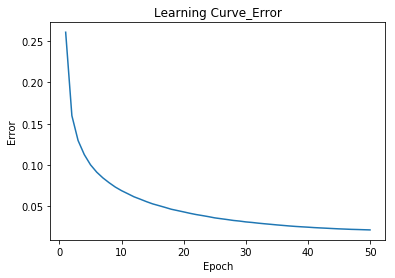

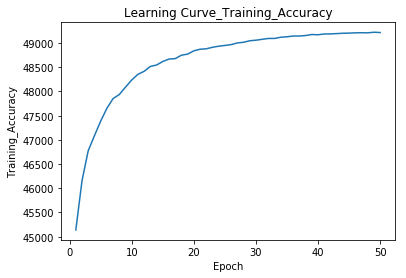

Iteration:  1/50[==============] -Error: 0.2324849825  -Training_Accuracy:  90.86  -time: 77.69 
Iteration:  2/50[==============] -Error: 0.1523346156  -Training_Accuracy:  93.10  -time: 155.35 
Iteration:  3/50[==============] -Error: 0.1242014884  -Training_Accuracy:  94.16  -time: 236.82 
Iteration:  4/50[==============] -Error: 0.1058905924  -Training_Accuracy:  94.98  -time: 316.74 
Iteration:  5/50[==============] -Error: 0.0931853140  -Training_Accuracy:  95.44  -time: 397.12 
Iteration:  6/50[==============] -Error: 0.0834088109  -Training_Accuracy:  95.95  -time: 478.10 
Iteration:  7/50[==============] -Error: 0.0750862751  -Training_Accuracy:  96.25  -time: 558.90 
Iteration:  8/50[==============] -Error: 0.0688618458  -Training_Accuracy:  96.46  -time: 638.40 
Iteration:  9/50[==============] -Error: 0.0634116200  -Training_Accuracy:  96.79  -time: 718.76 
Iteration: 10/50[==============] -Error: 0.0585634533  -Training_Accuracy:  96.98  -time: 799.08 
Iteration: 11/50[====

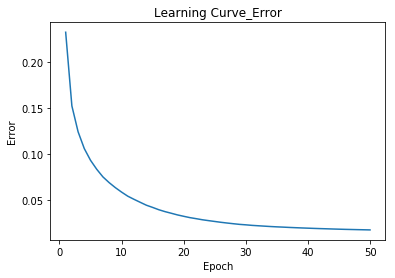

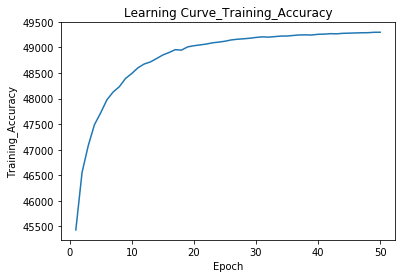

Iteration:  1/50[==============] -Error: 0.2178286668  -Training_Accuracy:  91.81  -time: 112.90 
Iteration:  2/50[==============] -Error: 0.1426631191  -Training_Accuracy:  93.49  -time: 224.47 
Iteration:  3/50[==============] -Error: 0.1164437261  -Training_Accuracy:  94.57  -time: 335.04 
Iteration:  4/50[==============] -Error: 0.0991806233  -Training_Accuracy:  95.46  -time: 443.76 
Iteration:  5/50[==============] -Error: 0.0866203226  -Training_Accuracy:  95.99  -time: 551.16 
Iteration:  6/50[==============] -Error: 0.0765052054  -Training_Accuracy:  96.52  -time: 659.06 
Iteration:  7/50[==============] -Error: 0.0680815834  -Training_Accuracy:  96.68  -time: 769.70 
Iteration:  8/50[==============] -Error: 0.0617306308  -Training_Accuracy:  97.07  -time: 878.21 
Iteration:  9/50[==============] -Error: 0.0558132819  -Training_Accuracy:  97.29  -time: 988.17 
Iteration: 10/50[==============] -Error: 0.0509757216  -Training_Accuracy:  97.50  -time: 1096.78 
Iteration: 11/50[==

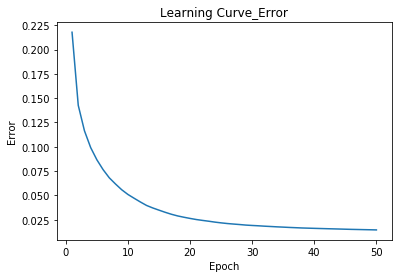

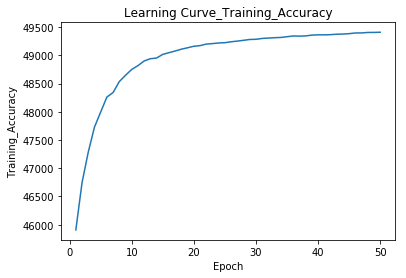

In [4]:
#Your implementation goes here
errors = {}
my_mnist_net_100 = NeuralNetwork(784,100,10,learning_rate=0.1)
my_mnist_net_100.train(training_data,validation_data)
errors[100] = my_mnist_net_100.errors
my_mnist_net_200 = NeuralNetwork(784,200,10,learning_rate=0.1)
my_mnist_net_200.train(training_data,validation_data)
errors[200] = my_mnist_net_200.errors
my_mnist_net_300 = NeuralNetwork(784,300,10,learning_rate=0.1)
my_mnist_net_300.train(training_data,validation_data)
errors[300] = my_mnist_net_300.errors


In [6]:
my_mnist_net_100.save('Models/mod_H100_O10_It50_LR01_FuncSigm.model')
my_mnist_net_200.save('Models/mod_H200_O10_It50_LR01_FuncSigm.model')
my_mnist_net_300.save('Models/mod_H300_O10_It50_LR01_FuncSigm.model')

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
For the error we can notice that the more neurons we use in the hidden layer the smaller the error. On the other hand, the more neurons the longer time is needed for the training. 
<br><br>
We are also considering the problem of overfitting. The more neurons used to build the neural network the higher the risk of not generalizing enough. 
<br><br>
Regarding the final accuracy it is quite similar in all three cases, despite the difference in number of neurons (98.43, 98.59, 98.82).
<h4>Parameters</h4>
We used a number of iterations equal to 50, since it was a good compromise between time of execution and result obtained. Moreover, since we notice before that after a while the improvement is not growing so much anymore, increasing even more the iterations did not seem necessary.<br>
Regarding the learning rate, we were thinking of using 0.01 at first, since it was the best value so far, but we tried with 0.1 to have a bit more esploration of the neighborhood.

</div>

<b> Question 2.2.5 : </b> Add one additionnal hidden layer and train your network, discuss your results with different setting. 



Iteration:  1/50[==============] -Error: 0.7230418861  -Training_Accuracy:  59.07  -time: 15.66 
Iteration:  2/50[==============] -Error: 0.6655339814  -Training_Accuracy:  61.41  -time: 28.94 
Iteration:  3/50[==============] -Error: 0.6503623209  -Training_Accuracy:  61.78  -time: 41.88 
Iteration:  4/50[==============] -Error: 0.6371529417  -Training_Accuracy:  64.23  -time: 55.07 
Iteration:  5/50[==============] -Error: 0.6253746387  -Training_Accuracy:  64.12  -time: 68.57 
Iteration:  6/50[==============] -Error: 0.6149201628  -Training_Accuracy:  65.62  -time: 82.12 
Iteration:  7/50[==============] -Error: 0.6047674242  -Training_Accuracy:  65.87  -time: 95.80 
Iteration:  8/50[==============] -Error: 0.5948798854  -Training_Accuracy:  67.07  -time: 108.98 
Iteration:  9/50[==============] -Error: 0.5856090505  -Training_Accuracy:  68.71  -time: 122.70 
Iteration: 10/50[==============] -Error: 0.5773216333  -Training_Accuracy:  67.56  -time: 136.79 
Iteration: 11/50[==========

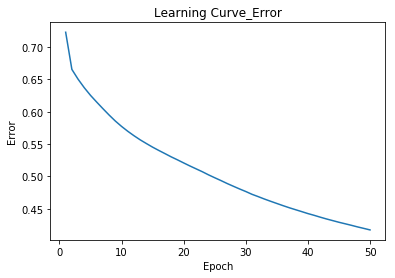

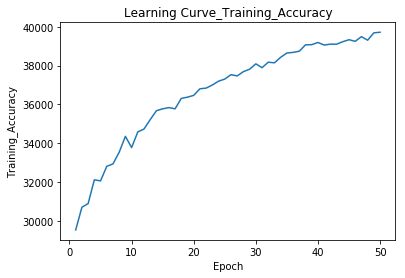

Iteration:  1/50[==============] -Error: 0.7000010441  -Training_Accuracy:  63.94  -time: 16.86 
Iteration:  2/50[==============] -Error: 0.6047455539  -Training_Accuracy:  68.87  -time: 32.70 
Iteration:  3/50[==============] -Error: 0.5544682759  -Training_Accuracy:  72.93  -time: 49.79 
Iteration:  4/50[==============] -Error: 0.5122850412  -Training_Accuracy:  74.25  -time: 66.17 
Iteration:  5/50[==============] -Error: 0.4790255196  -Training_Accuracy:  77.96  -time: 83.94 
Iteration:  6/50[==============] -Error: 0.4523670410  -Training_Accuracy:  79.07  -time: 100.22 
Iteration:  7/50[==============] -Error: 0.4307479456  -Training_Accuracy:  80.40  -time: 115.69 
Iteration:  8/50[==============] -Error: 0.4121357460  -Training_Accuracy:  81.00  -time: 131.69 
Iteration:  9/50[==============] -Error: 0.3948732061  -Training_Accuracy:  81.98  -time: 149.94 
Iteration: 10/50[==============] -Error: 0.3780434036  -Training_Accuracy:  81.27  -time: 168.46 
Iteration: 11/50[========

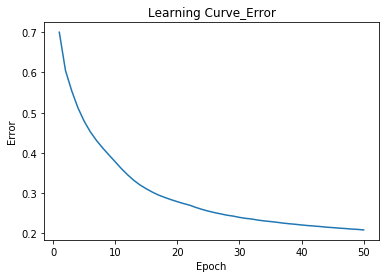

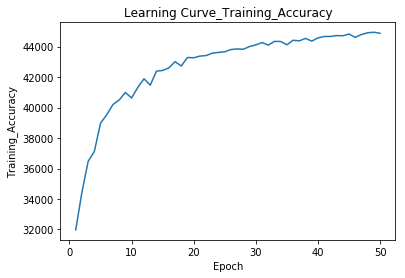

Iteration:  1/50[==============] -Error: 9.3046560705  -Training_Accuracy:  10.08  -time: 16.26 
Iteration:  2/50[==============] -Error: 8.9999183924  -Training_Accuracy:  10.09  -time: 31.48 
Iteration:  3/50[==============] -Error: 8.9999585305  -Training_Accuracy:  10.09  -time: 48.27 
Iteration:  4/50[==============] -Error: 9.0634812054  -Training_Accuracy:  10.45  -time: 68.26 
Iteration:  5/50[==============] -Error: 9.3873393733  -Training_Accuracy:  10.45  -time: 85.13 
Iteration:  6/50[==============] -Error: 9.3873599194  -Training_Accuracy:  10.45  -time: 101.11 
Iteration:  7/50[==============] -Error: 9.3873598537  -Training_Accuracy:  10.45  -time: 116.12 
Iteration:  8/50[==============] -Error: 9.3873596790  -Training_Accuracy:  10.45  -time: 132.43 
Iteration:  9/50[==============] -Error: 9.3873589034  -Training_Accuracy:  10.45  -time: 149.83 
Iteration: 10/50[==============] -Error: 9.3873396050  -Training_Accuracy:  10.45  -time: 166.29 
Iteration: 11/50[========

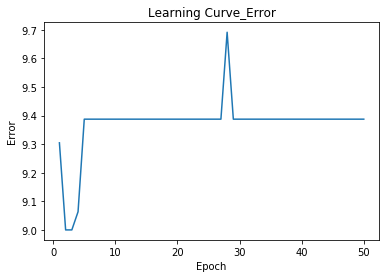

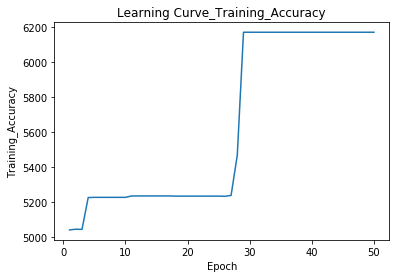

In [5]:
from NeuralNetwork import *
errors = {}
net_30_tanh_double = NeuralNetwork(784,30,10,hidden_layer1_size=30)
wi = np.load('wi.npy')
wo = np.load('wo.npy')
wh = net_30_tanh_double.W_hidden_to_hidden
for i in [0.001,0.01,1.0]:
    net_30_tanh.weights_initialisation(wi=wi,wo=wo,wh=wh)
    net_30_tanh.learning_rate=i
    net_30_tanh.train(training_data,validation_data,t_fnc=tanh, d_fnc=dtanh)
    errors[i] = net_30_tanh.errors

##### Comment

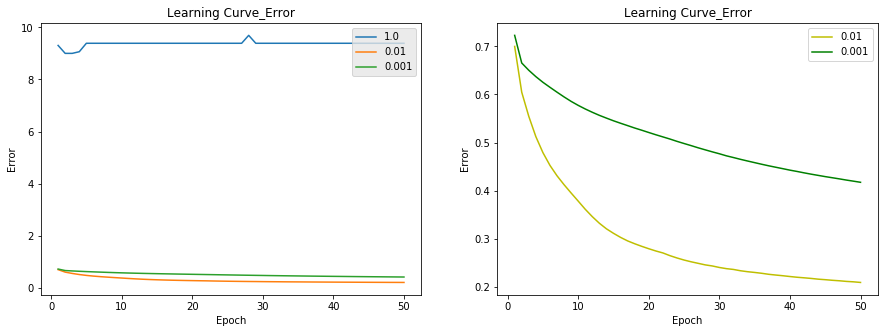

In [7]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(range(1,net_30_tanh.iterations+1),errors[1.0],label='1.0')
ax1.plot(range(1,net_30_tanh.iterations+1),errors[0.01],label='0.01')
ax1.plot(range(1,net_30_tanh.iterations+1),errors[0.001],label='0.001')

legend = ax1.legend(loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('0.90')

ax2 = fig.add_subplot(122)
ax2.plot(range(1,net_30_tanh.iterations+1),errors[0.01],label='0.01',color='y')
ax2.plot(range(1,net_30_tanh.iterations+1),errors[0.001],label='0.001',color='g')

legend2 = ax2.legend(loc='upper right')
frame2 = legend.get_frame()
frame2.set_facecolor('0.90')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Error')
ax1.set_title('Learning Curve_Error')

plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Learning Curve_Error')
plt.show()

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">   
In order to train this network we used the same learning rate, the same activation function and the same weigths as in section 2.2.3, with exception of the weigths for the second hidden layer (randomly initialized).<br>
We can notice how the trend of the error rate is very similar to the on of the network with one hidden layer, with the exception of the training done with learning rate 1.0.<br>
The higher number of hidden layers and of neurons should allow a better cathegorization of the images gives as input, and a faster convergence. It is also necessary to be carefull not to add too many neurons in order not to experience problems due to overfitting. Below there is a comparison between the evolution of the learning rate of the two networks.
</div>

In [49]:
# np.save('errors_double_hidden',errors)
# np.save('wh',wh)
arrors_no_double = np.load('errors223.npy')
asd = np.array(arrors_no_double)
asd = asd.reshape(1)
arrors_no_double = asd[0][0.01]

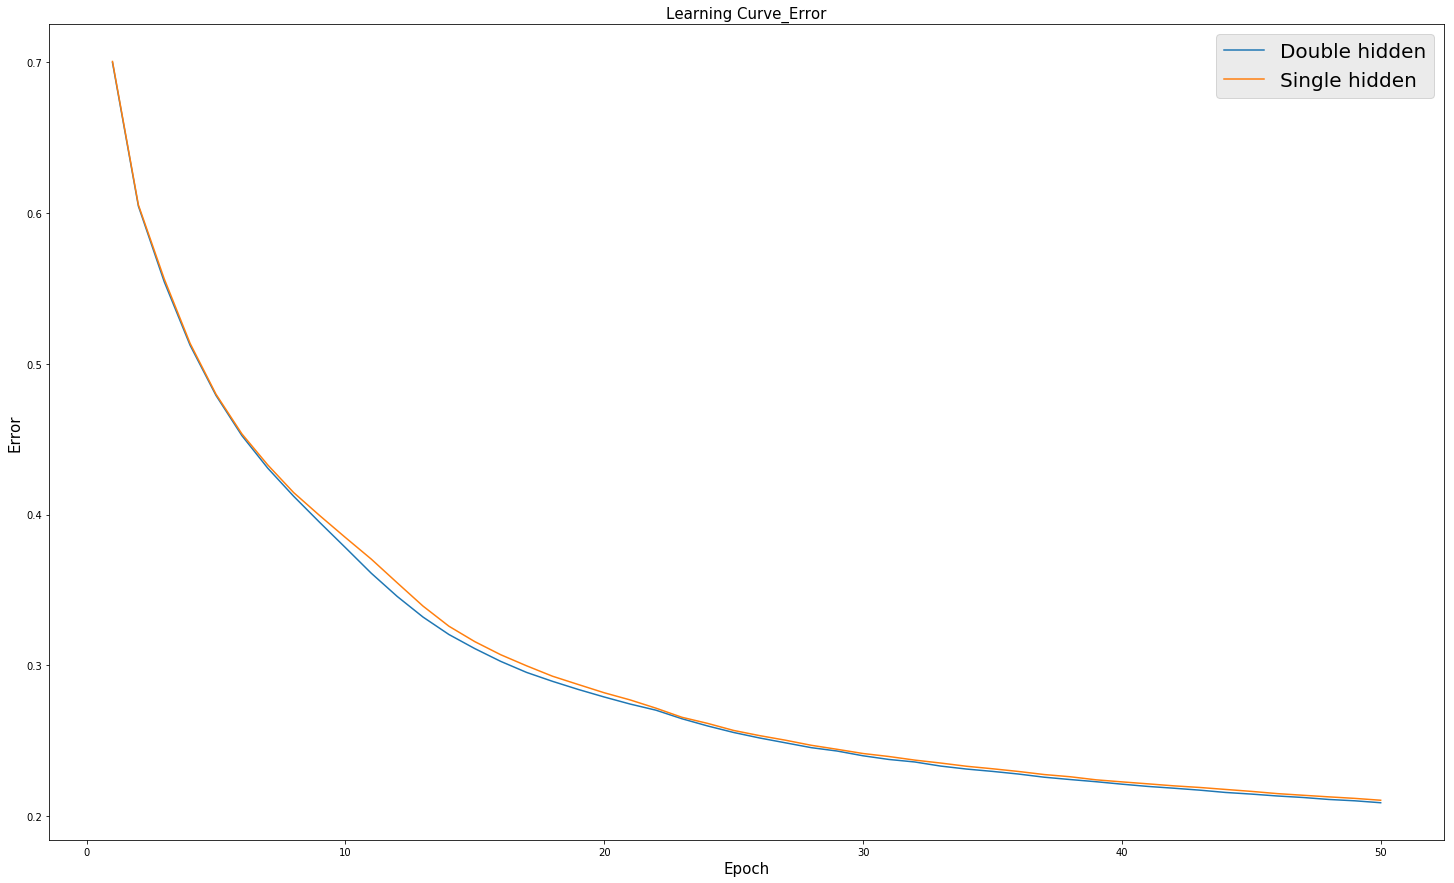

In [68]:

fig,ax = plt.subplots()

ax.plot(range(1,net_30_tanh_double.iterations+1),errors[0.01],label='Double hidden')
ax.plot(range(1,net_30_tanh_double.iterations+1),arrors_no_double,label='Single hidden')
legend = ax.legend(loc='upper right',prop={'size':20})
frame = legend.get_frame()
frame.set_facecolor('0.90')
frame.set
fig.set_figheight(15)
fig.set_figwidth(25)

plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.title('Learning Curve_Error',fontsize=15)
plt.show()

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">   
We can notice how the evolution of the error for the network with two hidden layers is better than the one for a single hidden layer, but this difference is not substantial. Also the speed convergence does not change significantly
</div>

<div style="background-color:#327191; vertical-align: middle; padding:10px 10px 10px 10px;">
    <h2><font color='white'>Further Work</font></h2>
</div>


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">   
It could be interesting to look for correlation:
<ul>
<li> in the increase of training time when increasing the number of neurons in the hidden layer
<li> in the different amount of time between the different netwoks
<li> apply this type of network to other type of images, like animals, and see how the complexity needed in order to have a right output changes accordingly to the problem
</ul>
</div>